<a href="https://colab.research.google.com/github/monozi/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise%20%238.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

In [69]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [70]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Mount Google Drive

In [71]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display a single image from your drive

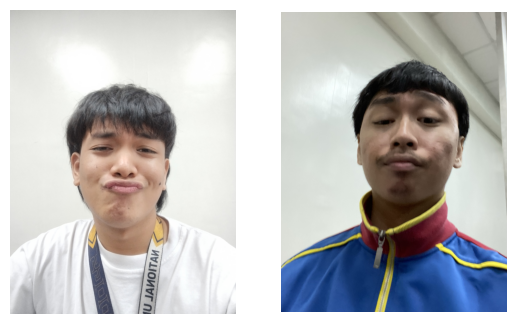

In [74]:
# put your answer here

# Path to your image file in Google Drive
img_gelo = '/content/drive/My Drive/Selfies/Angelo/6.jpg'
img_robbie = '/content/drive/My Drive/Selfies/Robbie/1.jpg'

# Open the image
image1 = Image.open(img_gelo)
image2 = Image.open(img_robbie)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

# Display the images on the subplots
axes[0].imshow(image1)
axes[1].imshow(image2)

# Hide axes for cleaner display
axes[0].axis('off')
axes[1].axis('off')

# Show the plot
plt.show()

## Split your data

In [75]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Selfies/')

In [76]:
images.shape

(35, 10000)

In [77]:
labels.shape

(35,)

In [78]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [79]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

## Train your SVM model

In [80]:
# put your answer here
model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [81]:
# put your answer here
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## Test your model using images not in your training set

In [88]:
# put your answer here
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/Tests/11.jpg', model)
print(f'Predicted label:', result)

Predicted label: [1]


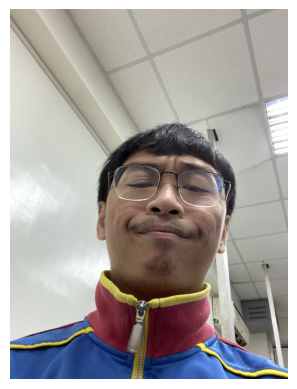

In [89]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Tests/11.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()